Output Produksi: 1166.6666666666665


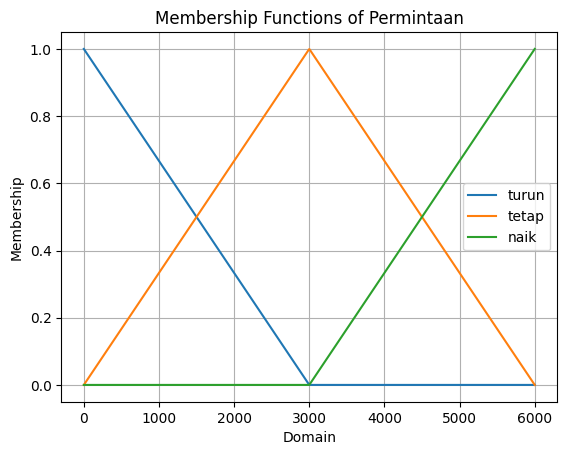

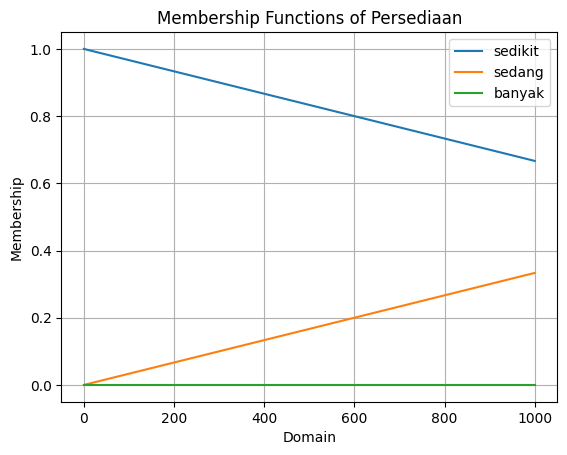

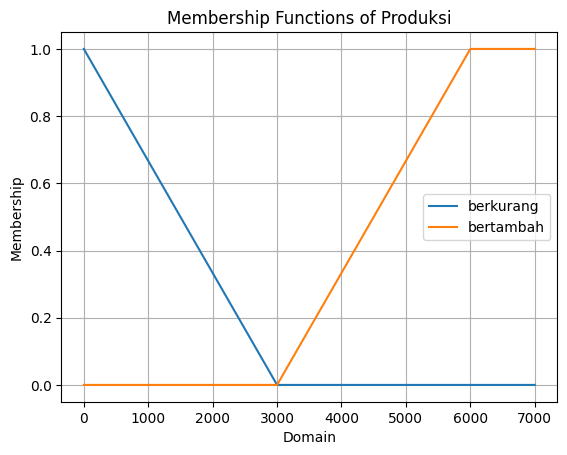

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class FuzzyVariable:
    def __init__(self, name, domain, membership_functions):
        self.name = name
        self.domain = domain
        self.membership_functions = membership_functions

    def fuzzify(self, value):
        """
        Calculate membership values for a given input value.
        """
        return {label: mf(value) for label, mf in self.membership_functions.items()}

class FuzzyRule:
    def __init__(self, antecedents, consequent):
        """
        antecedents: A dictionary of fuzzy variable labels and their terms.
        consequent: A tuple containing the output variable and its term.
        """
        self.antecedents = antecedents
        self.consequent = consequent

    def evaluate(self, fuzzified_inputs):
        """
        Evaluate the rule using the minimum operator.
        """
        activation_levels = []
        for var, term in self.antecedents.items():
            if term in fuzzified_inputs[var]:
                activation_levels.append(fuzzified_inputs[var][term])
            else:
                activation_levels.append(0)  # Default to 0 if term is not found
        return min(activation_levels)

class FuzzyInferenceSystem:
    def __init__(self, output_variable):
        self.rules = []
        self.output_variable = output_variable

    def add_rule(self, rule):
        self.rules.append(rule)

    def infer(self, inputs):
        """
        Perform fuzzy inference using the Tsukamoto method.
        """
        fuzzified_inputs = {var.name: var.fuzzify(value) for var, value in inputs.items()}
        weighted_sums = 0
        weights = 0

        for rule in self.rules:
            rule_strength = rule.evaluate(fuzzified_inputs)
            consequent_term = rule.consequent[1]

            # Defuzzify consequent using rule strength
            consequent_value = rule_strength * (self.output_variable.domain[1] if consequent_term == "bertambah" else self.output_variable.domain[0])

            weighted_sums += rule_strength * consequent_value
            weights += rule_strength

        return weighted_sums / weights if weights != 0 else 0

# Example membership functions
def decreasing(x):
    return max(0, min(1, (3000 - x) / 3000))

def steady(x):
    return max(0, min(1, 1 - abs((x - 3000) / 3000)))

def increasing(x):
    return max(0, min(1, (x - 3000) / 3000))

# Define variables
permintaan = FuzzyVariable("Permintaan", [0, 6000], {
    "turun": decreasing,
    "tetap": steady,
    "naik": increasing
})

persediaan = FuzzyVariable("Persediaan", [0, 1000], {
    "sedikit": decreasing,
    "sedang": steady,
    "banyak": increasing
})

produksi = FuzzyVariable("Produksi", [0, 7000], {
    "berkurang": decreasing,
    "bertambah": increasing
})

# Define rules
rule1 = FuzzyRule({"Permintaan": "turun", "Persediaan": "sedikit"}, ("Produksi", "bertambah"))
rule2 = FuzzyRule({"Permintaan": "naik", "Persediaan": "banyak"}, ("Produksi", "berkurang"))

# Create fuzzy inference system
fis = FuzzyInferenceSystem(produksi)
fis.add_rule(rule1)
fis.add_rule(rule2)

# Perform inference
inputs = {permintaan: 2500, persediaan: 500}
output = fis.infer(inputs)
print(f"Output Produksi: {output}")

# Plot membership functions
def plot_membership(variable, title):
    x = np.linspace(variable.domain[0], variable.domain[1], 1000)
    plt.figure()
    for label, mf in variable.membership_functions.items():
        y = [mf(xi) for xi in x]
        plt.plot(x, y, label=label)
    plt.title(title)
    plt.xlabel("Domain")
    plt.ylabel("Membership")
    plt.legend()
    plt.grid()
    plt.show()

# Plotting
plot_membership(permintaan, "Membership Functions of Permintaan")
plot_membership(persediaan, "Membership Functions of Persediaan")
plot_membership(produksi, "Membership Functions of Produksi")
